In [2]:
#ANALYZE

In [22]:
import os
import pickle as pk
import matplotlib.pyplot as plt
import numpy as np
import json
from collections import Counter

In [23]:
filenames = os.listdir('results')

In [24]:
filenames

['.ipynb_checkpoints',
 'flan-t5-small_withInjection.pickle',
 'flan-t5-small_withoutInjection.pickle',
 'flan-t5-large_withoutInjection.pickle',
 'flan-t5-large_withInjection.pickle',
 'batches',
 'flan-t5-small__withInjection.json',
 'flan-t5-large__withInjection.json']

In [28]:
small = json.load(open(f'results/flan-t5-small__withInjection.json'))
large = json.load(open(f'results/flan-t5-large__withInjection.json'))

In [29]:
len(small), len(large)

(4884, 3255)

In [43]:
small[0], large[0]

({'index': 0,
  'question': 'Which position did Knox Cunningham hold from May 1955 to Apr 1956?',
  'correctContext': 1,
  'scoreContextRetrieval': 0.2897856334136464,
  'quantileLimitSentences': 0,
  'targetWithSimilarityScore': [{'Ulster Unionist MP for South Antrim': 0.0}],
  'response': 'Parliamentary Private Secretary'},
 {'index': 0,
  'question': 'Which position did Knox Cunningham hold from May 1955 to Apr 1956?',
  'correctContext': 1,
  'scoreContextRetrieval': 0.2897856334136464,
  'quantileLimitSentences': 0,
  'targetWithSimilarityScore': [{'Ulster Unionist MP for South Antrim': 0.0}],
  'response': 'delegate to the Council of Europe and Western European Union Parliamentary Assembly'})

In [30]:
s = dict(Counter([x['index'] for x in small]))
l = dict(Counter([x['index'] for x in large]))

In [32]:
setS = dict(filter(lambda x: x[1]==4, s.items()))
setL = dict(filter(lambda x: x[1]==4, l.items()))

In [35]:
setS = set([x[0] for x in setS.items()])
setL = set([x[0] for x in setL.items()])

In [45]:
intersection = list(setS.intersection(setL))

In [46]:
len(intersection), intersection

(813,
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  182,
  183,
  184

In [50]:
len(small), len(large)

(4884, 3255)

In [51]:
small = [x for x in small if x['index'] in intersection]
large = [x for x in large if x['index'] in intersection]

In [55]:
len(small), len(large), len(small) / 4, len(large) / 4

(3252, 3252, 813.0, 813.0)

In [57]:
correctContextRetrievedsmall = [e for e in small if e['correctContext']==1]
print(f'correct context retrieved: {len(correctContextRetrievedsmall) / len(small)}\nincorrect context retrived: {1 - len(correctContextRetrievedsmall) / len(small)}')

correct context retrieved: 0.8929889298892989
incorrect context retrived: 0.1070110701107011


In [58]:
correctContextRetrievedlarge = [e for e in large if e['correctContext']==1]
print(f'correct context retrieved: {len(correctContextRetrievedlarge) / len(large)}\nincorrect context retrived: {1 - len(correctContextRetrievedlarge) / len(large)}')

correct context retrieved: 0.8929889298892989
incorrect context retrived: 0.1070110701107011


In [59]:
np.mean([e['scoreContextRetrieval'] for e in correctContextRetrievedsmall])

0.31590904414205995

In [60]:
np.mean([e['scoreContextRetrieval'] for e in correctContextRetrievedlarge])

0.31590904414205995

In [61]:
correctContextRetrievedsmall[0]

{'index': 0,
 'question': 'Which position did Knox Cunningham hold from May 1955 to Apr 1956?',
 'correctContext': 1,
 'scoreContextRetrieval': 0.2897856334136464,
 'quantileLimitSentences': 0,
 'targetWithSimilarityScore': [{'Ulster Unionist MP for South Antrim': 0.0}],
 'response': 'Parliamentary Private Secretary'}

In [62]:
for e in correctContextRetrievedsmall:
    e['targetWithSimilarityScore'] = max(e['targetWithSimilarityScore'], key=lambda x: list(x.values())[0])
for e in correctContextRetrievedlarge:
    e['targetWithSimilarityScore'] = max(e['targetWithSimilarityScore'], key=lambda x: list(x.values())[0])

In [72]:
correctContextRetrievedsmall[:2]

[{'index': 0,
  'question': 'Which position did Knox Cunningham hold from May 1955 to Apr 1956?',
  'correctContext': 1,
  'scoreContextRetrieval': 0.2897856334136464,
  'quantileLimitSentences': 0,
  'targetWithSimilarityScore': {'Ulster Unionist MP for South Antrim': 0.0},
  'response': 'Parliamentary Private Secretary'},
 {'index': 0,
  'question': 'Which position did Knox Cunningham hold from May 1955 to Apr 1956?',
  'correctContext': 1,
  'scoreContextRetrieval': 0.2897856334136464,
  'quantileLimitSentences': 0.5,
  'targetWithSimilarityScore': {'Ulster Unionist MP for South Antrim': 0.0},
  'response': 'Parliamentary Private Secretary'}]

In [71]:
correctContextRetrievedlarge[:2]

[{'index': 0,
  'question': 'Which position did Knox Cunningham hold from May 1955 to Apr 1956?',
  'correctContext': 1,
  'scoreContextRetrieval': 0.2897856334136464,
  'quantileLimitSentences': 0,
  'targetWithSimilarityScore': {'Ulster Unionist MP for South Antrim': 0.0},
  'response': 'delegate to the Council of Europe and Western European Union Parliamentary Assembly'},
 {'index': 0,
  'question': 'Which position did Knox Cunningham hold from May 1955 to Apr 1956?',
  'correctContext': 1,
  'scoreContextRetrieval': 0.2897856334136464,
  'quantileLimitSentences': 0.5,
  'targetWithSimilarityScore': {'Ulster Unionist MP for South Antrim': 0.7365488249910898},
  'response': 'MP for South Antrim'}]

In [19]:
#for e in correctContextRetrievedsmall:
#    e['targetWithSimilarityScore'] = max(e['targetWithSimilarityScore'], key=lambda x: x[1])
#for e in correctContextRetrievedlarge:
#    e['targetWithSimilarityScore'] = max(e['targetWithSimilarityScore'], key=lambda x: x[1])

In [65]:
groupedByQuestionList = []
groupedByQuestion = {}
for e in correctContextRetrievedsmall:
    question = e['question']
    if question not in groupedByQuestion:
        groupedByQuestion[question] = []
    groupedByQuestion[question].append( list(e['targetWithSimilarityScore'].values())[0] )
groupedByQuestion = {k: np.mean(v) for k, v in groupedByQuestion.items()}
groupedByQuestionList.append(groupedByQuestion)

groupedByQuestion = {}
for e in correctContextRetrievedlarge:
    question = e['question']
    if question not in groupedByQuestion:
        groupedByQuestion[question] = []
    groupedByQuestion[question].append( list(e['targetWithSimilarityScore'].values())[0] )
groupedByQuestion = {k: np.mean(v) for k, v in groupedByQuestion.items()}
groupedByQuestionList.append(groupedByQuestion)

In [66]:
groupedByQuestionList

[{'Which position did Knox Cunningham hold from May 1955 to Apr 1956?': 0.0,
  'Which position did Knox Cunningham hold from Apr 1956 to Oct 1956?': 0.2160209502582295,
  'Which position did Knox Cunningham hold from Apr 1957 to Apr 1959?': 0.31471698079588506,
  'Which position did Knox Cunningham hold from Oct 1959 to Sep 1964?': 0.25000000000000006,
  'What was the position of Knox Cunningham from Oct 1964 to May 1970?': 0.0,
  'Who was the spouse of Anna Karina from 1961 to 1968?': 0.0,
  'Who was the spouse of Anna Karina from 1968 to 1974?': 0.0,
  'Who was Anna Karina s spouse from 1978 to 1981?': 1.0,
  'Who was Anna Karina s spouse from 1982 to 2019?': 0.7500000000000002,
  'What position did Carl Eric Almgren take from 1960 to 1961?': 0.031002581850371476,
  'What was the position of Carl Eric Almgren from 1961 to 1967?': 1.0000000000000002,
  'What position did Carl Eric Almgren take from 1967 to 1969?': 0.0761227684795884,
  'What position did Carl Eric Almgren take from 19

In [67]:
groupedByQuantileList = []
groupedByQuantile = {}
for e in correctContextRetrievedsmall:
    quantile = e['quantileLimitSentences']
    if quantile not in groupedByQuantile:
        groupedByQuantile[quantile] = []
    groupedByQuantile[quantile].append(list(e['targetWithSimilarityScore'].values())[0])
groupedByQuantile = {k: np.mean(v) for k, v in groupedByQuantile.items()}
groupedByQuantileList.append(groupedByQuantile)

groupedByQuantile = {}
for e in correctContextRetrievedlarge:
    quantile = e['quantileLimitSentences']
    if quantile not in groupedByQuantile:
        groupedByQuantile[quantile] = []
    groupedByQuantile[quantile].append(list(e['targetWithSimilarityScore'].values())[0])
groupedByQuantile = {k: np.mean(v) for k, v in groupedByQuantile.items()}
groupedByQuantileList.append(groupedByQuantile)

In [68]:
groupedByQuantileList

[{0: 0.29511358065575105,
  0.5: 0.29852137092874326,
  0.75: 0.27951318291836985,
  0.9: 0.25020586819621665},
 {0: 0.5518245401256355,
  0.5: 0.5204250550566453,
  0.75: 0.43159423467990876,
  0.9: 0.31073860990950725}]

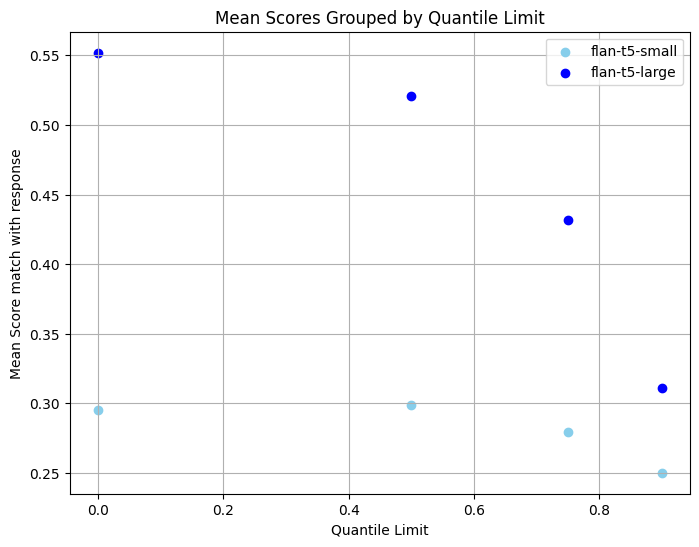

In [70]:
# Creating scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(list(groupedByQuantileList[0].keys()), list(groupedByQuantileList[0].values()), color='skyblue', marker='o', label='flan-t5-small')
plt.scatter(list(groupedByQuantileList[1].keys()), list(groupedByQuantileList[1].values()), color='blue', marker='o', label='flan-t5-large')

# Adding title and labels
plt.title('Mean Scores Grouped by Quantile Limit')
plt.xlabel('Quantile Limit')
plt.ylabel('Mean Score match with response')
plt.legend()
# Show plot
plt.grid(True)
plt.show()

In [83]:
list(correctContextRetrievedsmall[0]['targetWithSimilarityScore'].values())[0]

0.0

In [105]:
countsSmall = {0: 0, 0.5: 0, 0.75: 0, 0.9: 0}
countsLarge = {0: 0, 0.5: 0, 0.75: 0, 0.9: 0}

for entry in correctContextRetrievedsmall:
    quantile = entry['quantileLimitSentences']
    score = list(entry['targetWithSimilarityScore'].values())[0]
    if score != 0.0: countsSmall[quantile] += 1

for entry in correctContextRetrievedlarge:
    quantile = entry['quantileLimitSentences']
    score = list(entry['targetWithSimilarityScore'].values())[0]
    if score != 0.0: countsLarge[quantile] += 1

total = len(correctContextRetrievedsmall) / 4
print("small:")
print([(x[0], x[1]/total) for x in countsSmall.items()])
print('large')
print([(x[0], x[1]/total) for x in countsLarge.items()])

print(len(correctContextRetrievedsmall) / 4)

small:
[(0, 0.4393939393939394), (0.5, 0.43526170798898073), (0.75, 0.39807162534435264), (0.9, 0.36363636363636365)]
large
[(0, 0.6391184573002755), (0.5, 0.6212121212121212), (0.75, 0.5275482093663911), (0.9, 0.42424242424242425)]
726.0


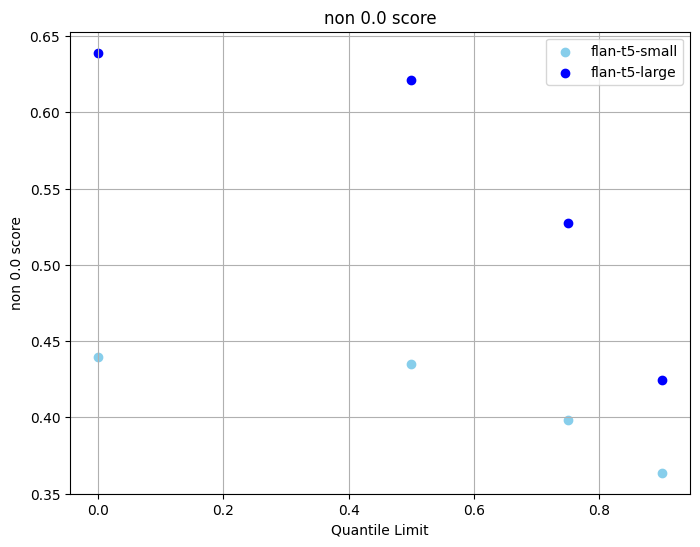

In [101]:
# Creating scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(list(countsSmall.keys()), [x / 726 for x in list(countsSmall.values())], color='skyblue', marker='o', label='flan-t5-small')
plt.scatter(list(countsLarge.keys()), [x / 726 for x in list(countsLarge.values())], color='blue', marker='o', label='flan-t5-large')

# Adding title and labels
plt.title('non 0.0 score')
plt.xlabel('Quantile Limit')
plt.ylabel('non 0.0 score')
plt.legend()
# Show plot
plt.grid(True)
plt.show()